# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

In [5]:
import numpy as np

def normal_distri_ratio_calc(n):
    
    #The specifications of the normal distribution are specified, ie- mean(mu) and std deviation(sigma)
    mu , sigma = 100 , 10
    
    # Defining ranges above the mean, ie - range_ref_1 = (mu + sigma) and range_ref_2 = (mu + 2*sigma)
    range_ref_1 = mu + sigma
    range_ref_2 = mu + (2*sigma)
    
    # Defining ranges below the mean, ie - range_ref_3 = (mu - sigma) and range_ref_4 = (mu - 2*sigma)
    range_ref_3 = mu - sigma
    range_ref_4 = mu - (2*sigma)

    #Generates "n" samples with mu mean and sigma standard deviation from a normal distribution
    random_normal_samples = np.random.normal(mu, sigma,int(n))

    #Counting the number (count_m) of randomly generated numbers lying in the range ([µ + σ, µ + 2σ] or [µ - 2σ, µ - σ])
    count_m = len([x for x in random_normal_samples if ((x >=range_ref_1) & (x <=range_ref_2))|((x >=range_ref_4) & (x <=range_ref_3))])

    #Return the ratio of count_m/n
    return int(count_m)/int(n)

# Asking user to enter number of samples to be drawn
print("Enter a number")
n = input()

#Converting the ration returned to a percentage
x = normal_distri_ratio_calc(n)*100

#Printing the result
print("Result (M/N ratio in percentage): "+ str(x) +"%")

Enter a number
1000000
Result (M/N ratio in percentage): 27.128600000000002%


<font color='green'>Correct : 10 points</font> <br>
Thanks for commenting!

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution


How would you convert this data to a form suitable for association analysis?

Assumptions:
1. The question does not specify the type of association analysis, answering the question with the assumption a recommendation system is desired from the association analysis

Answer :
1. 
a. We have 500 movies(Columns) rated by 1000 users(Rows) on a scale of [0,5].We would process this data in a tabular format - (Movie Titles - Rows) and (Users - Columns).<br>
b. We would impute the '0' ratings with Nulls to determine the movies the users have not seen.
<br>
<br>
<h6>Option 1</h6>
c. We would check correlation(pearson's correlation) between two movie columns to determine which other movie have users rated in a similar manner<br>
d. The movie with a high correlation with another movie(in terms of user ratings) would mean users have rated that movie in a similar manner and <u>that movie(movie with high correlation in user reviews) can be recommended along with the first movie</u><br><br><h6> Option2 </h6>
e. We could also plot correlation between two users to determine which other user has similar movie watching taste.<br>
f. Once we have a user with similar movie watching taste (determined by high correlation), <u>we can view the list of movies rated highly(above a certain cut-off) by the second user and recommend movies from this list not watched by the first user</u><br><br><h6>Option3 </h6> Source : <a>https://www.kaggle.com/ahm6644/movies-recommendations-by-association-rules</a><br>
g. Using a technique like apriori, we could compute common item-sets (sets of users users rating the movie above a certain threshold) and determine other movies with a similar itemset ie - Other users that have rated the movie highly, have also rated another movie highly<br>h. For this the dataframe of the movies and reviews would have to be modified to mark movies above a certain rating as 1 and all other movies below that rating a 0<br><br><br>


2.
Some of the type of attributes that we would have and would help the association analysis further would be:<br>
a. If <u>Genre is given</u> average rating by genre could be calculated as an attribute for each user<br>
    b. If <u>Length of movie</u> is given, average rating by length of the movie and standard deviation could be calculated as an attribute for each user<br>c. If <u>Number of music scores in the movie</u> is given, the averrage rating by the number of music scores in the movie and standard deviation could be calculated<br>d. The <u>Year of the movie release</u> was given , we could bucket the years of release and then calculate average and standard deviation 



<font color='red'>Incorrect : 0 points</font> <br>
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes
of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = **3000 binary attributes per user**.  
The resulting sparse data matrix would be **1000 rows x 3000 columns**.

### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

1. True<br>

2. False<br>

3. True<br>

4. True, Noise objects are very likely to be outliers as they are not part of the signal being captured and most likely would be on the extreme end of the scale of the signal resulting in them being outliers. Noise objects could also fall within the expected range of the signal and not be outliers as well<br>

5. False, Outlier objects may not be noise, because even though it maybe an underiable object, it is part of the data. Noise on the other hand is not part of the data<br>

<b>Note for 3.5</b> : The above answer is with the assumption that the data pre-processing pipeline is robust and any outlier objects are actually validated and properly calculated data points. Incase the pre-processing pipeline is not as robust, the outlier object may be so because of erroneous pre-processing and may actually be noise(answer to 3.5 with this <u><b>exception is True</u> </b>) <br><br>

<font color='green'>Correct : 5 points</font> <br>

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

The attributes are as follows : 

1. price price in US dollars (326--18,823) ----- Discrete, Quantitative,Ratio <br>
Note: Money can not be broken less than 1 cent so it is infact discrete<br><br>

2. carat weight of the diamond (0.2--5.01) ------ Continuous,Quantitative, Ratio<br><br>

3. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal) ------- Discrete, Qualitative, Ordinal<br><br>

4. color diamond colour, from J (worst) to D (best) ------ Discrete, Qualitative, Ordinal<br><br>

5. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) ------ Discrete, Qualitative, Ordinal<br><br>

6. x length in mm (0--10.74) ------ Continuous, Quantitative, Ratio<br><br>

7. y width in mm (0--58.9) ------ Continuous, Quantitative, Ratio<br><br>

8. z depth in mm (0--31.8) ------ Continuous, Quantitative, Ratio<br><br>

9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  ----- Continuous, Quantitaive, Ratio<br><br>

10. table width of top of diamond relative to widest point (43--95)  ----- Continuous, Quantitative, Ratio<br><br>

<font color='green'>Correct : 5 points</font> <br>

#### Solution 4.2

In [31]:
import pandas as pd

diamonds_df = pd.read_csv(f'/Users/rajananandw/Downloads/diamonds.csv', index_col = 0)
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color='green'>Correct : 2 points</font> <br>

#### Solution 4.3

<h6>a. For each quantitative attribute: find the mean, median, standard deviation, and range</h6>



In [67]:
#marking quantitaive columns
quantitative_cols = ['carat','depth','table','price','x','y','z']
#Calculating mean, median and standard deviation for quantitative columns
diamonds_df[quantitative_cols].agg({np.mean, np.median, np.std})

,carat,depth,table,price,x,y,z
median,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699


In [68]:
#Range as min and max of columns
diamonds_df[quantitative_cols].agg({np.min,np.max})

,carat,depth,table,price,x,y,z
amax,5.01,79.0,95.0,18823,10.74,58.9,31.8
amin,0.20,43.0,43.0,326,0.00,0.0,0.0


In [69]:
#Range as difference between min and max of column
diff = diamonds_df[quantitative_cols].max() - diamonds_df[quantitative_cols].min()
pd.DataFrame(diff, columns=["Range"])

,Range
carat,4.81
depth,36.00
table,52.00
price,18497.00
x,10.74
y,58.90
z,31.80


<h6>b. For each qualitative attribute, find the mode. </h6>



In [70]:
qualitative_cols = ['cut','color','clarity']
#The mode for the 3 qualitative columns is extracted
diamonds_df[qualitative_cols].mode()

,cut,color,clarity
0,Ideal,G,SI1


<h6>c. Find the Interquartile Range (IQR) of the ‘price’ variable.</h6>

In [111]:
#25th percentile value of price column
price_25perc = diamonds_df['price'].quantile(0.25)
#75th percentile value of price column
price_75perc = diamonds_df['price'].quantile(0.75)
iqr_price = price_75perc - price_25perc
print("The interquartile range of price is")
print(iqr_price)

The interquartile range of price is
4374.25


<font color='green'>Correct : 5.5 points</font> <br>

#### Solution 4.4 <br> 
What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut).

In [112]:
samples_cut = list(diamonds_df['cut'])

count_good_cuts = [x for x in samples_cut if (x =='Very Good') | (x =='Premium')|(x =='Ideal')]

print("Fraction of samples with cut better than 'Very Good' : ",len(count_good_cuts)/len(samples_cut))

Fraction of samples with cut better than 'Very Good' :  0.8791991101223582


<AxesSubplot:>

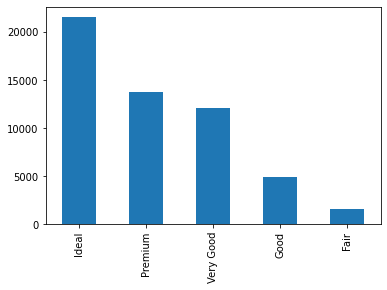

In [113]:
#Bar plot showing the distribution of data samples by cut
diamonds_cut = diamonds_df[['cut']]

diamonds_cut['cut'].value_counts().plot.bar()

<font color='green'>Correct : 2.5 points</font> <br>

#### Solution 4.5 <br>
Plot a histogram of the 'carat' variable. 

Source: <a>https://thinkingneuron.com/how-to-visualize-data-distribution-of-a-continuous-variable-in-python/</a>

<AxesSubplot:ylabel='Frequency'>

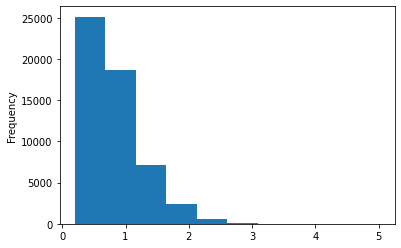

In [115]:
diamonds_carat = diamonds_df[['carat']]

diamonds_carat['carat'].plot.hist()

<font color='green'>Correct : 2 points</font> <br>
Thanks for giving the link! 

#### Solution 4.6 <br>
Plot a scatter plot of ‘carat’ vs ‘price’

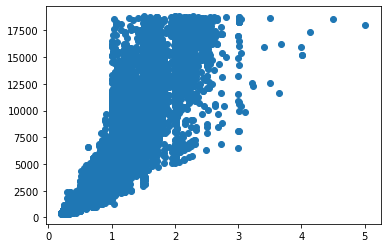

In [116]:
import matplotlib.pyplot as plt
plt.plot()
plt.scatter(x = diamonds_df["carat"], y = diamonds_df["price"])

<font color='green'>Correct : 2 points</font> <br>
Thanks for giving the link! 

#### Solution 4.7 <br>
Compute the correlation between ‘carat’ and ‘price’.

In [121]:
col_carat = diamonds_df['carat']
col_price = diamonds_df["price"]
correlation_bw_carat_price = col_carat.corr(col_price)
print("Correlation between price and carat is:",correlation)

Correlation between price and carat is: 0.9215913011934779


<font color='green'>Correct :1 point</font> <br>

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

Cosine measure of similarity is a good measure to compare the two documents


\begin{equation}
\cos ({\bf tf_ix},{\bf tf_iy})= {{\bf tf_ix} {\bf tf_iy} \over \|{\bf tf_ix}\| \|{\bf tf_iy}\|} = \frac{ \sum_{i=1}^{n}{{\bf tf_ix}_i{\bf tf_iy}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf tf_ix}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf tf_i}_i)^2}} }
\end{equation}

<font color='blue'>Partially Correct : 1.75 points</font> <br>
Reasoning: You forgot a y in the denominator for tf_i_y_i

#### Solution 5.2

I believe the inverse document frequency measure has the advantages that:

1. Reduces the weightage of very common words in comparing documents ie -a,is,it etc.
2. Gives higher weightage to words that occur only in a few documents(sparsely occuring words)

<font color='green'>Correct : 2 points</font> <br>

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

In [14]:
def SMC(x,y):
    count = 0
    for a,b in zip(x,y):
        if(a==b):
            count+=1
    
    return count/len(x)


def Hamming_function(x,y):
    count = 0
    for a,b in zip(x,y):
        if(a!=b):
            count+=1
    
    return count/len(x)


def Jaccard_function(x,y):
    count =  0
    numbers_to_be_reduced = 0
    for i,j in zip(x,y):
        if i==1 and j==1:
            count+=1
        if i==0 and j==0:
            numbers_to_be_reduced+=1
    return (count/(len(x)-numbers_to_be_reduced))




#Calculating promixity measures
x = [1,0,1,0,1,0,1,0,1,0,1,0,1]
y = [1,0,0,0,1,0,0,0,1,0,0,0,1]

print("Hamming Distance is ",hamming_function(x,y))

print("SMC is ",SMC(x,y))

print("Jaccard Similarity is ",Jaccard_function(x,y))
 

NameError: name 'hamming_function' is not defined

<font color='blue'>Partially Correct : 4 points</font> <br>
Reasoning: Spelling of hamming_function is incorrect.

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

In [20]:
def Std(a):
    c = mean(a)
    std = sum((x-c)**2 for x in a)
    return std

def mean(a):
    return sum(a)/len(a)

def Euclid(x,y):
    a,b = np.array(x),np.array(y)
    return np.sqrt(np.sum(np.square(a-b)))

def Covariance(x,y):
    return dotted([a - mean(x) for a in x],[a - mean(x) for a in x])/(len(x)-1)

def Correlation(a,b):
    
    if(Std(a)!=0 and Std(b)!=0):
        return Covariance(a, b) / (Std(a) * Std(b))
    else: 
        return 0

def L_max(x,y):
    return max([abs(i-j) for i,j in zip(x,y)])


def dotted(A,B): 
    return (sum(a*b for a,b in zip(A,B)))

def Cosine_similarity(x,y):# x and y are vectors
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [21]:
x1 = [1,1,1,1]
y1 = [3,3,3,3]

print("Cosine :",Cosine_similarity(x1,y1))
print("Correlation :",Correlation(x1,y1))
print("Euclidean :",Euclid(x1,y1))


Cosine : 1.0
Correlation : 0
Euclidean : 4.0


In [22]:
x2 = [0,1,0,1,0,1] 
y2 = [1,0,1,0,1,0]

print("Cosine :",Cosine_similarity(x2,y2))
print("Correlation :",Correlation(x2,y2))
print("Eucliden :",Euclid(x2,y2))
print("Jaccard :",Jaccard_function(x2,y2))

Cosine : 0.0
Correlation : 0.13333333333333333
Eucliden : 2.449489742783178
Jaccard : 0.0


In [23]:
x3 = [1,1,0,1,0,1]
y3 = [1,1,1,0,0,1]

print("Cosine :",Cosine_similarity(x3,y3))
print("Correlation :",Correlation(x3,y3))
print("L_Max :",L_max(x3,y3))
print("Jaccard :",Jaccard_function(x3,y3))

Cosine : 0.75
Correlation : 0.15
L_Max : 1
Jaccard : 0.6


<font color='blue'>Partially Correct : 5 points</font> <br>
Correlation is incorrect. Check your covariance formula once again!  

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

<font color='green'>Total marks : 47.75 points</font> <br> 